In [1]:
#Import Modules
import os
import deconvolution_tools as dt
import numpy as np
import pandas as pd

%matplotlib inline


In [2]:
drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

print boc.get_all_cre_lines()
print boc.get_all_targeted_structures()

[u'Cux2-CreERT2', u'Emx1-IRES-Cre', u'Nr5a1-Cre', u'Rbp4-Cre_KL100', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre']
[u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']


In [3]:
pd.DataFrame(boc.get_experiment_containers(cre_lines=['Emx1-IRES-Cre'], targeted_structures=['VISp']))

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Emx1-IRES-Cre,280638,False,561312433,275,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-280638,[],VISp
1,Emx1-IRES-Cre,261458,False,540168835,375,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-261458,[],VISp
2,Emx1-IRES-Cre,237706,False,517328083,175,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],VISp
3,Emx1-IRES-Cre,252174,False,536323956,175,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93(MG)-252174,[],VISp
4,Emx1-IRES-Cre,260936,False,545578995,375,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,[],VISp
5,Emx1-IRES-Cre,260936,False,543677425,175,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,[],VISp
6,Emx1-IRES-Cre,237706,False,527676429,275,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],VISp


In [4]:
pd.DataFrame(boc.get_ophys_experiments(experiment_container_ids=[545578995]))

,acquisition_age_days,cre_line,donor_name,experiment_container_id,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,107,Emx1-IRES-Cre,260936,545578995,546716391,375,Ai93(TITL-GCaMP6f),three_session_A,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,VISp
1,105,Emx1-IRES-Cre,260936,545578995,546341286,375,Ai93(TITL-GCaMP6f),three_session_C2,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,VISp
2,100,Emx1-IRES-Cre,260936,545578995,545578997,375,Ai93(TITL-GCaMP6f),three_session_B,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,VISp


In [5]:
ophys_experiment_id = 546341286 #example experiment

dataset = boc.get_ophys_experiment_data(ophys_experiment_id)

In [6]:
#Use dt.get_dff to get all dff traces and timestamps
dff_traces, timestamps, cell_specimen_ids = dt.get_dff(boc=boc, ophys_experiment_id=ophys_experiment_id)

#Check that the shape makes sense
print dff_traces.shape
print timestamps.shape

(139, 124030)
(124030,)


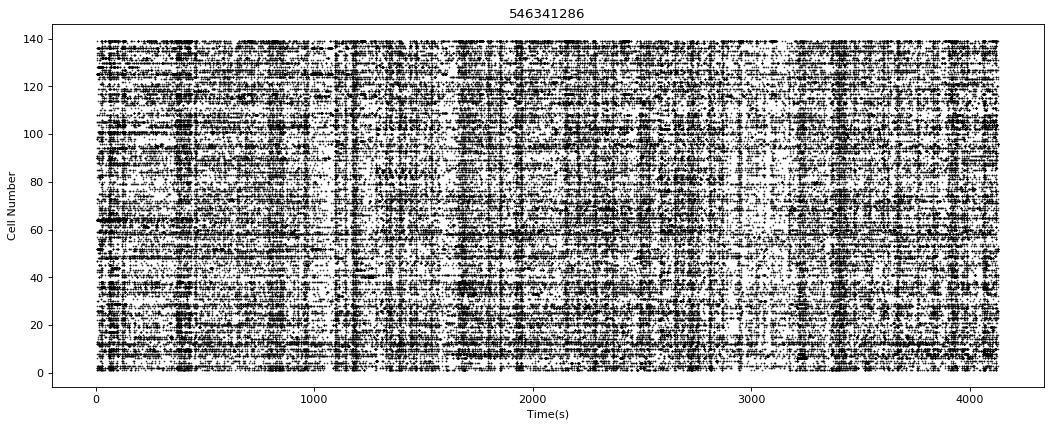

569667072


1745473.6689300002

In [22]:
#Use get_spiking_data to use the Oasis deconvolution algorithm

spikes, spike_times, isis = dt.get_spiking_data(dff_traces=dff_traces, timestamps=timestamps, cell_specimen_ids=cell_specimen_ids,num_std=3)
dt.plot_raster(spike_times, title=ophys_experiment_id)

keys = spike_times.keys()
print keys[0]
np.sum(spike_times[keys[0]])


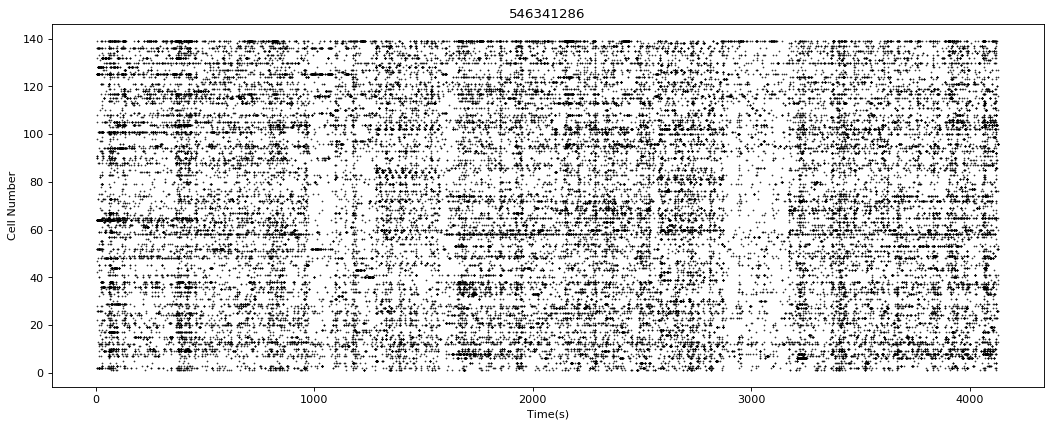

569667072


464702.89763000008

In [28]:
#Use get_spiking_data to use the Oasis deconvolution algorithm

spikes, spike_times, isis = dt.get_spiking_data(dff_traces=dff_traces, timestamps=timestamps, cell_specimen_ids=cell_specimen_ids,num_std=5)
dt.plot_raster(spike_times, title=ophys_experiment_id)

keys = spike_times.keys()
print keys[0]
np.sum(spike_times[keys[0]])

In [16]:
#Plot the spike times in a raster plot



In [29]:
spikes, timestamps, spike_times, isis = dt.get_epoch_spiking_data(boc, ophys_experiment_id,num_std=5)

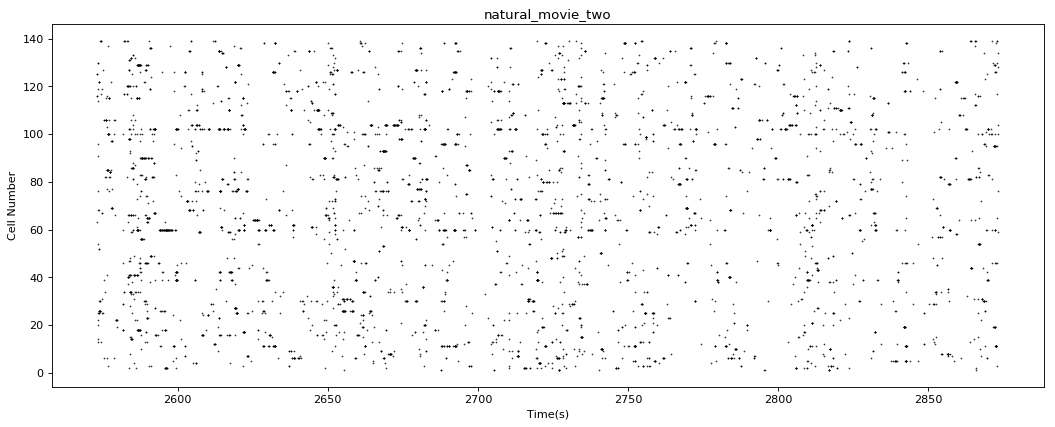

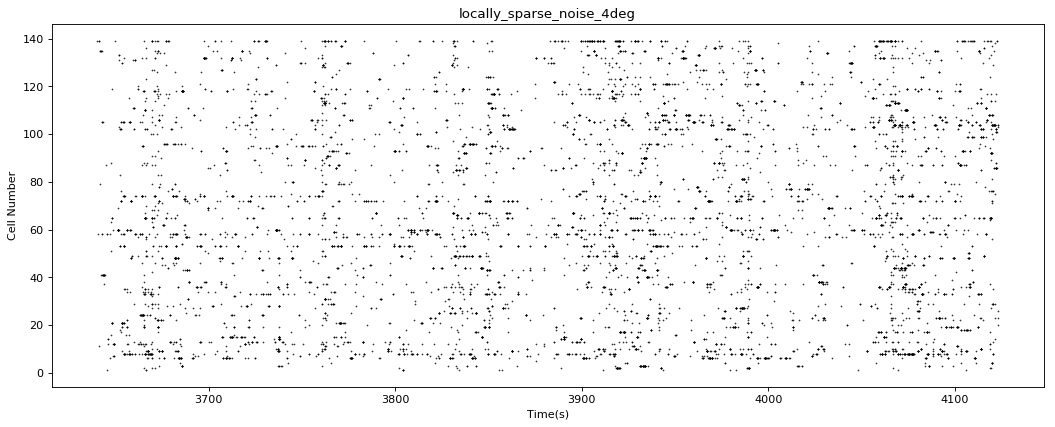

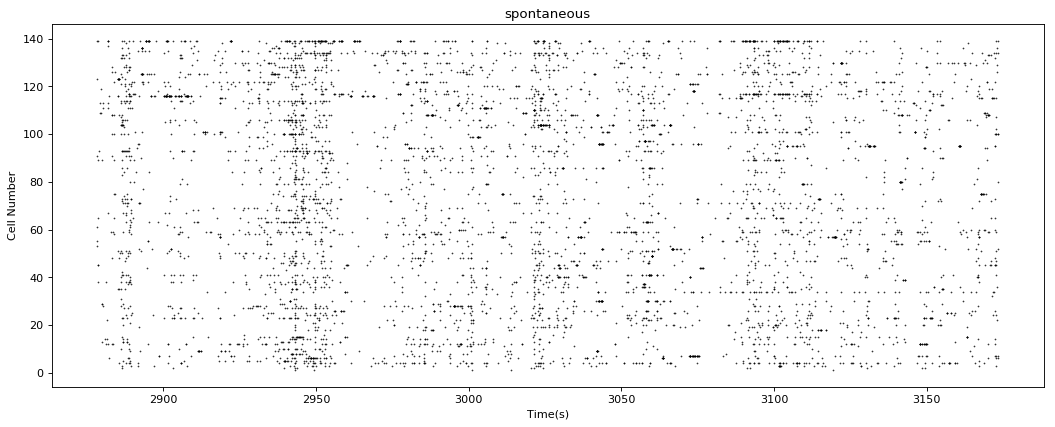

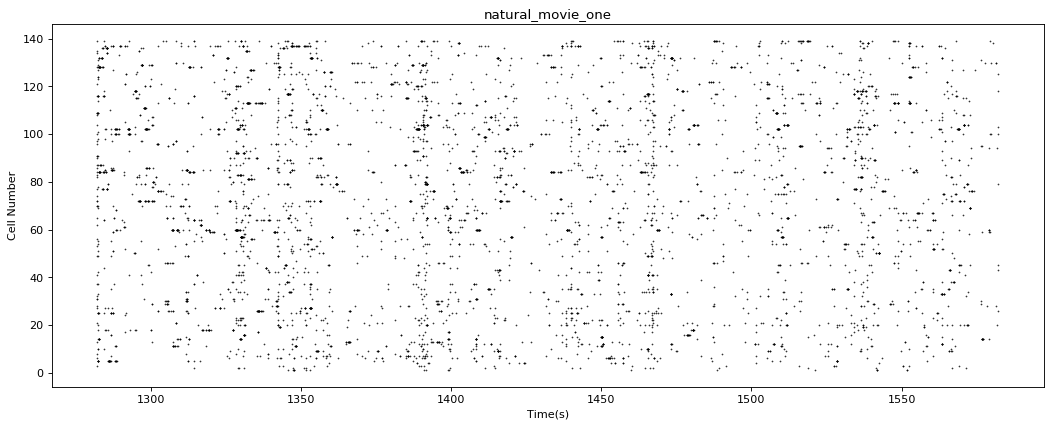

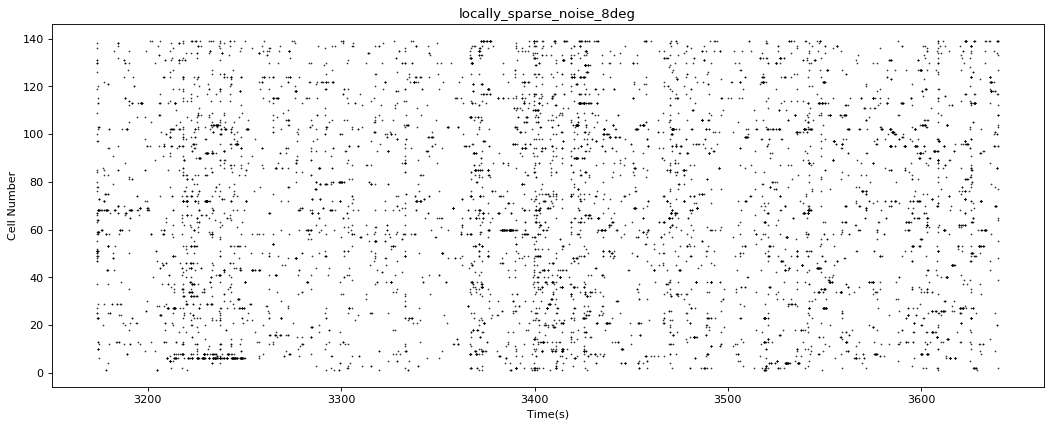

In [30]:
for stim, spike_time_data in spike_times.iteritems():
    dt.plot_raster(spike_time_data, title=stim)